# Predict the confirmed cases in Brazil and which ward they will be admitted to

# Load and take a look at the data

In [290]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [291]:
# Load data
ds=pd.read_csv('covid19_clinical_dataset.csv')

In [292]:
ds.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
ds.shape

(5644, 111)

In [294]:
ds.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

# Check and treat null values

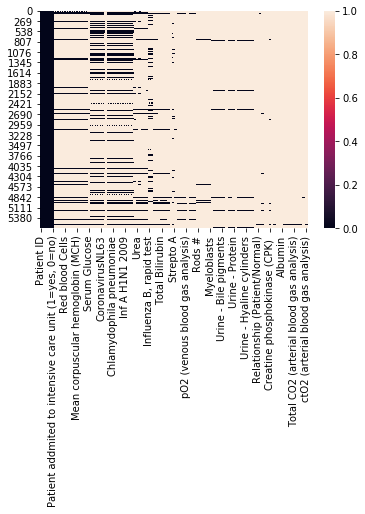

In [295]:
sns.heatmap(ds.isnull())

In [296]:
ds.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [297]:
ds.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [298]:
ds.loc[ds['Patient addmited to regular ward (1=yes, 0=no)'] == 1, 'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'] = 1
ds.loc[ds['Patient addmited to regular ward (1=yes, 0=no)'] == 0, 'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'] = 0
ds.loc[ds['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1, 'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'] = 2
ds.loc[ds['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1, 'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'] = 3

In [299]:
ds.head(9)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN,2.0


In [300]:
# Replace NaN with np.nan so that the rows can be dropped, and drop the rows containing np.nan
ds.replace('NaN',np.nan, inplace = True)

In [301]:
ds=ds.fillna(ds.mean())

In [302]:
ds.head(20)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)
0,44477f75e8169d2,13,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
1,126e9dd13932f68,17,negative,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
2,a46b4402a0e5696,8,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
3,f7d619a94f97c45,5,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
4,d9e41465789c2b5,15,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
5,75f16746216c4d1,9,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
6,2a2245e360808d7,13,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
7,509197ec73f1400,16,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682e+00,-7.742120e-01,1.429667e+00,-1.672222e+00,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,7.303929e-01,5.185185e-09,2.0
9,5f1ed301375586c,17,negative,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.0


In [303]:
ds.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)     0
Length: 112, dtype: int64

In [304]:
ds.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)',
       'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'],
      dtype='object', length=112)

In [305]:
ds_cut = ds[['Patient age quantile', 'SARS-Cov-2 exam result','Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)','Leukocytes', 'Lymphocytes']].copy()

In [306]:
ds_cut.head()

,Patient age quantile,SARS-Cov-2 exam result,Ward (Regular=1 Semi Intensive=2 Intenssive Care =3),Leukocytes,Lymphocytes
0,13,negative,0.0,6.220930e-09,-7.863787e-09
1,17,negative,0.0,-9.461035e-02,3.183658e-01
2,8,negative,0.0,6.220930e-09,-7.863787e-09
3,5,negative,0.0,6.220930e-09,-7.863787e-09
4,15,negative,0.0,6.220930e-09,-7.863787e-09


# Check correlation

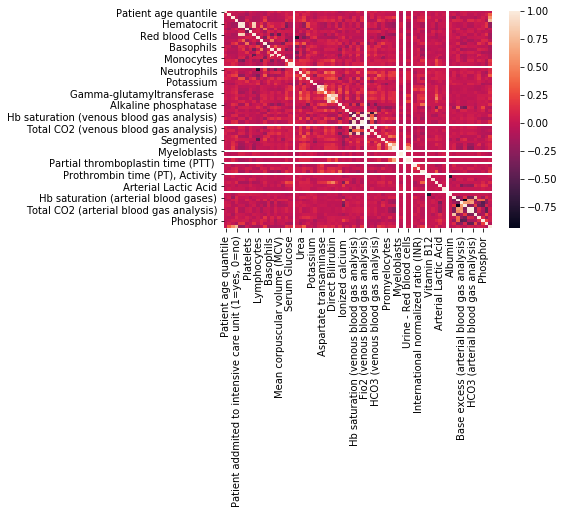

In [307]:
dscor=ds.corr()
sns.heatmap(dscor)

# Summary statistics

In [308]:
ds.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)
count,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,...,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000
mean,9.318391,0.013997,0.008859,0.007264,-2.187398e-09,-1.598342e-08,-3.820600e-10,7.373957e-09,8.416942e-09,-7.863787e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.053508
std,5.777903,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,3.266203e-01,3.266203e-01,...,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,5.953330e-02,5.953330e-02,6.917145e-02,0.334618
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00,0.000000
25%,4.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.000000
50%,9.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.000000
75%,14.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,...,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09,0.000000
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00,3.000000


# Data visualizations

In [309]:
ds.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)',
       'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'],
      dtype='object', length=112)

In [310]:
ds.groupby('Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)')['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'].count()

Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)
0.0    5474
1.0      79
2.0      50
3.0      41
Name: Ward (Regular=1 Semi Intensive=2 Intenssive Care =3), dtype: int64

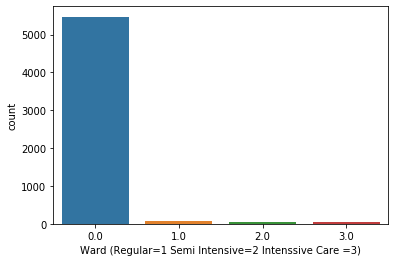

In [311]:
sns.countplot(ds['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'])

Only a very small amount of patients were admitted to the hospital of these a decreasing amount of patients are admitted as the seriousness of the ward increases.

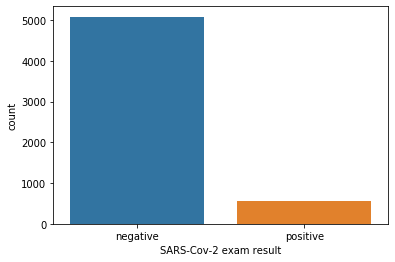

In [312]:
sns.countplot(ds['SARS-Cov-2 exam result'])

The vast majority of cases were negative.

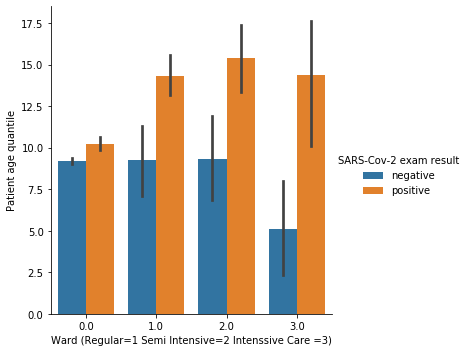

In [313]:
sns.catplot(x='Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)', y= 'Patient age quantile', hue='SARS-Cov-2 exam result', data=ds, kind='bar')

Younger people are fare less likely to be admitted to any ward when testing positive for Covid.

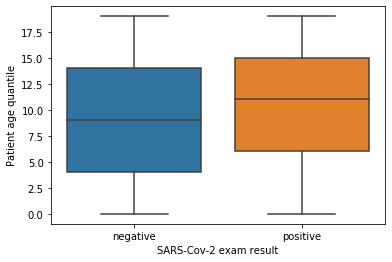

In [314]:
sns.boxplot(x='SARS-Cov-2 exam result',y='Patient age quantile',data=ds)

Older people are more likely to test positive for covid.

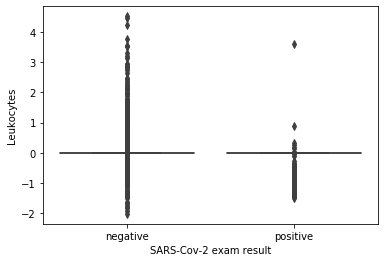

In [315]:
sns.boxplot(x='SARS-Cov-2 exam result',y='Leukocytes',data=ds)

Leucocytes are generally lower in patients who tested positive.

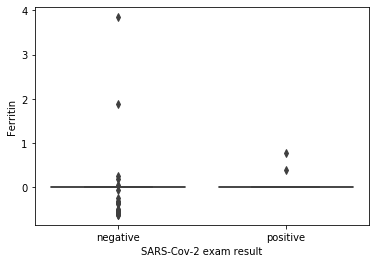

In [316]:
sns.boxplot(x='SARS-Cov-2 exam result',y='Ferritin',data=ds)

Not enough data to draw a conclusion

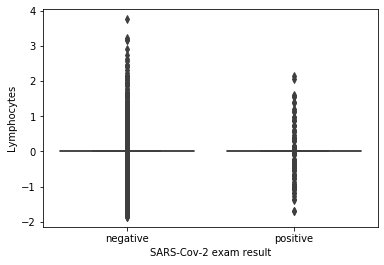

In [317]:
sns.boxplot(x='SARS-Cov-2 exam result',y='Lymphocytes',data=ds)

Lymphocytes alo trend lower for patients who test positive.

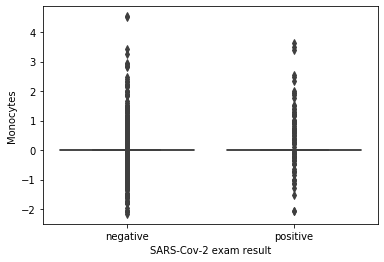

In [318]:
sns.boxplot(x='SARS-Cov-2 exam result',y='Monocytes',data=ds)

# Check eveness of dataset

In [319]:
ds.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)',
       'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'],
      dtype='object', length=112)

In [320]:
covid_counts = ds['SARS-Cov-2 exam result'].value_counts()
covid_counts

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [321]:
covid_percentage = ds['SARS-Cov-2 exam result'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
covid_percentage

negative    90.1%
positive     9.9%
Name: SARS-Cov-2 exam result, dtype: object

The data is not distributed evenly over the target column and the split will need to be stratified.

In [322]:
ward_counts = ds['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'].value_counts()
ward_counts

0.0    5474
1.0      79
2.0      50
3.0      41
Name: Ward (Regular=1 Semi Intensive=2 Intenssive Care =3), dtype: int64

In [323]:
ward_percentage = ds['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ward_percentage

0.0    97.0%
1.0     1.4%
2.0     0.9%
3.0     0.7%
Name: Ward (Regular=1 Semi Intensive=2 Intenssive Care =3), dtype: object

The data is not distributed evenly over the target column and the split will need to be stratified.

# Encode categorical columns to numeric values

In [324]:
eds=ds_cut

In [325]:
ds_cut.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)', 'Leukocytes',
       'Lymphocytes'],
      dtype='object')

In [326]:
ds_cut.dtypes

Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)    float64
Leukocytes                                              float64
Lymphocytes                                             float64
dtype: object

In [327]:
# Encode one or specific columns in a dataset
from sklearn.preprocessing import LabelEncoder

Encoderds = LabelEncoder() 
eds['SARS-Cov-2 exam result'] = Encoderds.fit_transform(eds['SARS-Cov-2 exam result'])

In [328]:
eds.head()

,Patient age quantile,SARS-Cov-2 exam result,Ward (Regular=1 Semi Intensive=2 Intenssive Care =3),Leukocytes,Lymphocytes
0,13,0,0.0,6.220930e-09,-7.863787e-09
1,17,0,0.0,-9.461035e-02,3.183658e-01
2,8,0,0.0,6.220930e-09,-7.863787e-09
3,5,0,0.0,6.220930e-09,-7.863787e-09
4,15,0,0.0,6.220930e-09,-7.863787e-09


# Check correlation after encoding

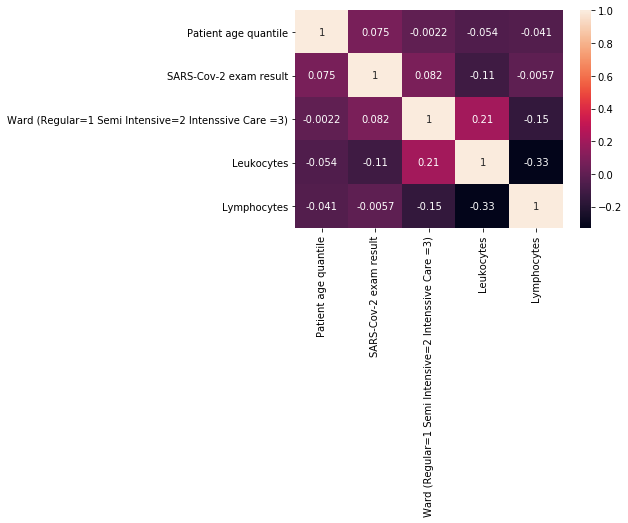

In [329]:
dscor=eds.corr()
sns.heatmap(dscor, annot=True)

# Drop irrelevant columns

In [330]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds

# Find and remove outliers

In [331]:
nds.shape

(5644, 5)

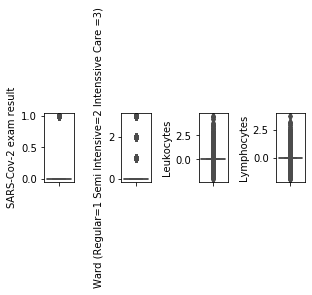

In [332]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=5
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

Not removing outliers because then all differentiation is lost.

# Check and adjust skewness

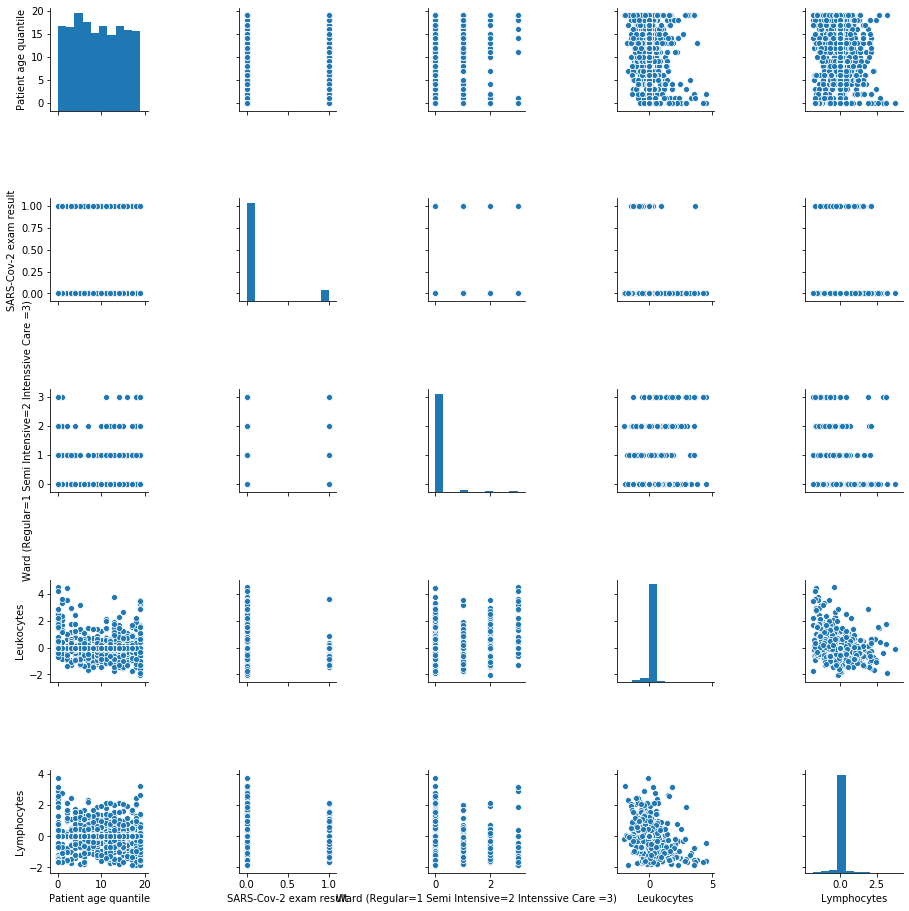

In [333]:
# Checking pairplots
sns.pairplot(nds)
plt.show()

In [334]:
# Show skewness (less than 0.55 is ok)
nds.skew()

Patient age quantile                                    0.034623
SARS-Cov-2 exam result                                  2.688541
Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)    7.020153
Leukocytes                                              4.365807
Lymphocytes                                             1.452355
dtype: float64

# Split data into x and y for ward classification

In [335]:
nds.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)', 'Leukocytes',
       'Lymphocytes'],
      dtype='object')

In [340]:
nds.shape

(5644, 5)

In [341]:
# Lineup target and input values
nds_x=nds.drop(columns=['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'])
y=nds[['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)']]

In [345]:
y.shape

(5644, 1)

# Apply scaler

In [365]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(nds_x)
x =pd.DataFrame(x,columns=nds_x.columns)

In [344]:
x.shape

(5644, 4)

In [338]:
x.skew()

Patient age quantile      0.034623
SARS-Cov-2 exam result    2.688541
Leukocytes                4.365807
Lymphocytes               1.452355
dtype: float64

# Train-Test split

In [346]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20, stratify=nds['Ward (Regular=1 Semi Intensive=2 Intenssive Care =3)'])

# Model

In [347]:
# Using GridSearchCV to select the best parameter

In [348]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [349]:
# Best parameters for SVC
from sklearn.model_selection import GridSearchCV

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'poly'}

In [350]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [351]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

# Comparing classification algorithm results

In [352]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [353]:
from sklearn.model_selection import cross_val_score

In [354]:
KNN=KNeighborsClassifier(n_neighbors= 10)
SV=SVC(kernel='poly')# check c parameter?
DT=DecisionTreeClassifier(criterion='gini')# check random_state?
MNB=MultinomialNB()

In [355]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')



Accuracy score = 0.9672276350752879


cross validation score = 0.9684623109270069


classification_report
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1095
         1.0       0.25      0.12      0.17        16
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00         8

    accuracy                           0.97      1129
   macro avg       0.31      0.28      0.29      1129
weighted avg       0.95      0.97      0.96      1129



[[1090    4    1    0]
 [  14    2    0    0]
 [  10    0    0    0]
 [   6    2    0    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* SVC ********************

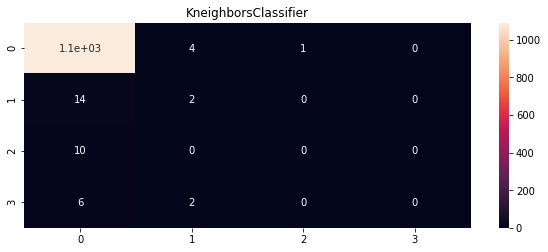

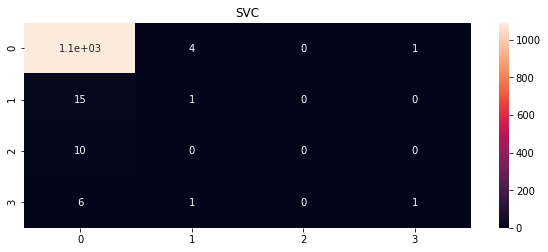

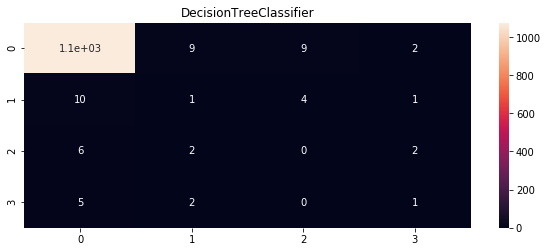

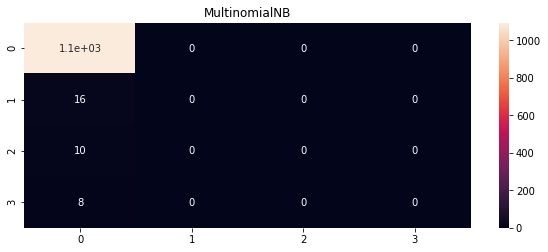

In [356]:
model_list=[]
score=[]
cvs=[]


for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
  
    print('\n\n')

In [357]:
# Show the results of the models above in a table
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KneighborsClassifier,96.722764,96.846231
1,SVC,96.722764,97.058840
2,DecisionTreeClassifier,95.394154,95.854014
3,MultinomialNB,96.988485,96.987950


In [358]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9636846767050488
[[1086    5    3    1]
 [  13    1    2    0]
 [   9    1    0    0]
 [   6    1    0    1]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1095
         1.0       0.12      0.06      0.08        16
         2.0       0.00      0.00      0.00        10
         3.0       0.50      0.12      0.20         8

    accuracy                           0.96      1129
   macro avg       0.40      0.29      0.32      1129
weighted avg       0.95      0.96      0.96      1129



In [359]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9592559787422498
[[1080    7    7    1]
 [  12    2    2    0]
 [  10    0    0    0]
 [   5    2    0    1]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1095
         1.0       0.18      0.12      0.15        16
         2.0       0.00      0.00      0.00        10
         3.0       0.50      0.12      0.20         8

    accuracy                           0.96      1129
   macro avg       0.41      0.31      0.33      1129
weighted avg       0.95      0.96      0.95      1129



In [361]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [362]:
gbr=GradientBoostingClassifier(learning_rate= 0.001, n_estimators= 500,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.9698848538529672
[[1095    0    0    0]
 [  16    0    0    0]
 [  10    0    0    0]
 [   8    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1095
         1.0       0.00      0.00      0.00        16
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00         8

    accuracy                           0.97      1129
   macro avg       0.24      0.25      0.25      1129
weighted avg       0.94      0.97      0.96      1129



I choose the RandomForestClassifiermodel but many of the models have the same results

accuracy score = 97

precision =97

recall = 100

# Save the model

In [363]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Ward.pkl')

['Ward.pkl']

In [366]:
# Load and use model to make a prediction
model=joblib.load('Ward.pkl')
model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

Since the vast majority of results would be 0 it is hard to tell, but the model might still be inaccurate.

# Split data into x and y for Covid test

In [367]:
# Lineup target and input values
nds_x=nds.drop(columns=['SARS-Cov-2 exam result'])
y=nds[['SARS-Cov-2 exam result']]

# Train-Test split

In [368]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=55, test_size=0.20, stratify=nds['SARS-Cov-2 exam result'])

# Models

In [369]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9078830823737821
[[1014    3]
 [ 101   11]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1017
           1       0.79      0.10      0.17       112

    accuracy                           0.91      1129
   macro avg       0.85      0.55      0.56      1129
weighted avg       0.90      0.91      0.87      1129



In [370]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9016829052258636
[[1010    7]
 [ 104    8]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1017
           1       0.53      0.07      0.13       112

    accuracy                           0.90      1129
   macro avg       0.72      0.53      0.54      1129
weighted avg       0.87      0.90      0.87      1129



In [371]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [372]:
gbr=GradientBoostingClassifier(learning_rate= 0.001, n_estimators= 1000,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.9034543844109831
[[1017    0]
 [ 109    3]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       1.00      0.03      0.05       112

    accuracy                           0.90      1129
   macro avg       0.95      0.51      0.50      1129
weighted avg       0.91      0.90      0.86      1129



I choose the RandomForestClassifiermodel but many of the models have the same results

accuracy score = 90.3

precision =90

recall = 100

# Save Model

In [373]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Pos_Neg.pkl')

['Pos_Neg.pkl']

In [374]:
# Load and use model to make a prediction
model=joblib.load('Pos_Neg.pkl')
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

Unfortunately I suspect that there is a great chance that all predictions will be 0. Need more positive test results to do a better analysis.